In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('all_seasons.csv')
df.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


In [3]:
df_dummies = pd.get_dummies(df, columns=['team_abbreviation', 'college'])
df_dummies = df_dummies.drop('draft_round', axis=1)

In [4]:
df_dummies['draft_year'] = df_dummies['draft_year'].replace('Undrafted', np.nan)
df_dummies['draft_number'] = df_dummies['draft_number'].replace('Undrafted', np.nan)
df_dummies = df_dummies.dropna(subset=['draft_year', 'draft_number'])
df_dummies[['draft_year', 'draft_number']].head(10)
df_dummies['season'] = df_dummies['season'].str.split('-').str[0]
df_dummies['draft_year'] = pd.to_numeric(df_dummies['draft_year'])
df_dummies['season'] = pd.to_numeric(df_dummies['season'])
df_dummies['Unnamed: 0'] = df_dummies['season'] - df_dummies['draft_year'] + 1
df_dummies.rename(columns={'Unnamed: 0': 'years_in_leage'}, inplace=True)

In [5]:
df_dummies.head()

,years_in_leage,player_name,age,player_height,player_weight,country,draft_year,draft_number,gp,pts,...,college_Wingate,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR)
0,11,Dennis Rodman,36.0,198.12,99.790240,USA,1986,27,55,5.7,...,0,0,0,0,0,0,0,0,0,0
1,7,Dwayne Schintzius,28.0,215.90,117.933920,USA,1990,24,15,2.3,...,0,0,0,0,0,0,0,0,0,0
2,18,Earl Cureton,39.0,205.74,95.254320,USA,1979,58,9,0.8,...,0,0,0,0,0,0,0,0,0,0
3,2,Ed O'Bannon,24.0,203.20,100.697424,USA,1995,9,64,3.7,...,0,0,0,0,0,0,0,0,0,0
4,12,Ed Pinckney,34.0,205.74,108.862080,USA,1985,10,27,2.4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_first_year_player = df_dummies.query('years_in_leage == 1')
df_second_year_player = df_dummies.query('years_in_leage == 2')

In [7]:
# Create a boolean mask that identifies rows in df1 where the 'player_name' column is not in df2
mask1 = df_first_year_player['player_name'].isin(df_second_year_player['player_name'])
mask2 = df_second_year_player['player_name'].isin(df_first_year_player['player_name'])

# Use the mask to filter df1 and keep only the rows where the 'player_name' column is in df2
df_first_year_player = df_first_year_player[mask1]
df_second_year_player = df_second_year_player[mask2]

In [8]:
df_first_year_player

,years_in_leage,player_name,age,player_height,player_weight,country,draft_year,draft_number,gp,pts,...,college_Wingate,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR)
21,1,Erick Dampier,21.0,210.82,120.201880,USA,1996,10,72,5.1,...,0,0,0,0,0,0,0,0,0,0
30,1,Derek Fisher,22.0,185.42,90.718400,USA,1996,24,80,3.9,...,0,0,0,0,0,0,0,0,0,0
68,1,Jamie Feick,22.0,203.20,115.665960,USA,1996,48,41,3.7,...,0,0,0,0,0,0,0,0,0,0
78,1,Jermaine O'Neal,18.0,210.82,102.511792,USA,1996,17,45,4.1,...,0,0,0,0,0,0,0,0,0,0
114,1,Ben Davis,24.0,205.74,108.862080,USA,1996,43,20,1.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11640,1,Jaden McDaniels,20.0,205.74,83.914520,USA,2020,28,63,6.8,...,0,0,0,0,0,0,0,0,0,0
11650,1,Devin Vassell,20.0,195.58,90.718400,USA,2020,11,62,5.5,...,0,0,0,0,0,0,0,0,0,0
11653,1,Desmond Bane,23.0,195.58,97.522280,USA,2020,30,68,9.2,...,0,0,0,0,0,0,0,0,0,0
11661,1,Deni Avdija,20.0,205.74,95.254320,Israel,2020,9,54,6.3,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_second_year_player

,years_in_leage,player_name,age,player_height,player_weight,country,draft_year,draft_number,gp,pts,...,college_Wingate,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR)
442,2,Martin Muursepp,23.0,205.74,106.59412,USA,1996,25,41,5.7,...,0,0,0,0,0,0,0,0,0,0
455,2,Mark Hendrickson,24.0,205.74,99.79024,USA,1996,31,48,3.4,...,0,0,0,0,0,0,0,0,0,0
460,2,Marcus Camby,24.0,210.82,99.79024,USA,1996,2,63,12.1,...,0,0,0,0,0,0,0,0,0,0
462,2,Malik Rose,23.0,200.66,113.39800,USA,1996,44,53,3.0,...,0,0,0,0,0,0,0,0,0,0
463,2,Randy Livingston,23.0,193.04,95.25432,USA,1996,42,12,0.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12199,2,Josh Green,21.0,195.58,90.71840,Australia,2020,18,67,4.8,...,0,0,0,0,0,0,0,0,0,0
12205,2,Jordan Nwora,23.0,203.20,102.05820,USA,2020,45,62,7.9,...,0,0,0,0,0,0,0,0,0,0
12228,2,Obi Toppin,24.0,205.74,99.79024,USA,2020,8,72,9.0,...,0,0,0,0,0,0,0,0,0,0
12257,2,Nick Richards,24.0,213.36,111.13004,Jamaica,2020,42,50,3.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_merged = df_first_year_player.merge(df_second_year_player[['player_name', 'pts']], on='player_name', how='left')
df_merged

,years_in_leage,player_name,age,player_height,player_weight,country,draft_year,draft_number,gp,pts_x,...,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR),pts_y
0,1,Erick Dampier,21.0,210.82,120.201880,USA,1996,10,72,5.1,...,0,0,0,0,0,0,0,0,0,11.8
1,1,Derek Fisher,22.0,185.42,90.718400,USA,1996,24,80,3.9,...,0,0,0,0,0,0,0,0,0,5.8
2,1,Jamie Feick,22.0,203.20,115.665960,USA,1996,48,41,3.7,...,0,0,0,0,0,0,0,0,0,2.3
3,1,Jermaine O'Neal,18.0,210.82,102.511792,USA,1996,17,45,4.1,...,0,0,0,0,0,0,0,0,0,4.5
4,1,Ben Davis,24.0,205.74,108.862080,USA,1996,43,20,1.5,...,0,0,0,0,0,0,0,0,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,Jaden McDaniels,20.0,205.74,83.914520,USA,2020,28,63,6.8,...,0,0,0,0,0,0,0,0,0,9.2
1000,1,Devin Vassell,20.0,195.58,90.718400,USA,2020,11,62,5.5,...,0,0,0,0,0,0,0,0,0,12.3
1001,1,Desmond Bane,23.0,195.58,97.522280,USA,2020,30,68,9.2,...,0,0,0,0,0,0,0,0,0,18.2
1002,1,Deni Avdija,20.0,205.74,95.254320,Israel,2020,9,54,6.3,...,0,0,0,0,0,0,0,0,0,8.4


# start moduling

In [11]:
# Split data into features and target
X = df_merged.drop(columns=['pts_y', 'years_in_leage', 'player_name', 'country'])
X.head()

,age,player_height,player_weight,draft_year,draft_number,gp,pts_x,reb,ast,net_rating,...,college_Wingate,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR)
0,21.0,210.82,120.201880,1996,10,72,5.1,4.1,0.6,-2.0,...,0,0,0,0,0,0,0,0,0,0
1,22.0,185.42,90.718400,1996,24,80,3.9,1.2,1.5,5.1,...,0,0,0,0,0,0,0,0,0,0
2,22.0,203.20,115.665960,1996,48,41,3.7,5.2,0.6,-12.2,...,0,0,0,0,0,0,0,0,0,0
3,18.0,210.82,102.511792,1996,17,45,4.1,2.8,0.2,1.3,...,0,0,0,0,0,0,0,0,0,0
4,24.0,205.74,108.862080,1996,43,20,1.5,1.4,0.0,-0.4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = df_merged['pts_y']
y.head()

0    11.8
1     5.8
2     2.3
3     4.5
4     0.6
Name: pts_y, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test - train
# 20% - 80%

In [20]:
# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the standardized training data
model.fit(X_train_scaled, y_train)

# Standardize the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the standardized test data
predictions = model.predict(X_test_scaled)

# Evaluate the model's performance on the test set
score = model.score(X_test_scaled, y_test)
print(score)

-8.867206012188494e+25


In [15]:
predictions

array([ 1.11199229e+01,  6.08249426e+00,  5.31208158e+00,  7.49171829e+00,
        9.56349897e+00, -2.75824272e+09,  4.99021053e+00,  6.33420968e+00,
        8.52315354e+00,  1.68085756e+01,  2.58428264e+00,  5.75108457e+00,
        4.56483436e+00,  2.08576076e+01,  7.52432013e+00,  6.04321837e+00,
       -2.75824272e+09,  7.84003425e+00,  1.57739749e+01,  5.48874426e+00,
       -2.75824272e+09,  3.79555249e+00,  4.85485291e+00, -2.75824272e+09,
        1.18717041e+01,  9.69491220e+00,  9.68805623e+00,  7.09771705e+00,
        5.00968003e+00,  4.93217134e+00,  1.48381255e+01,  3.84998345e+00,
        8.68179584e+00,  5.16831994e+00,  6.87539458e+00,  3.55734825e+00,
        3.13532543e+00,  1.20529251e+01,  1.32460010e+01,  1.18532324e+01,
        1.39279268e+01,  3.58239007e+00,  8.33066583e+00,  1.01508994e+01,
        1.81904566e+01, -2.75824272e+09,  5.03554845e+00,  1.36409543e+01,
        3.47828317e+00,  1.58263035e+01,  5.22412229e+00,  1.19313571e+01,
       -2.75824145e+09,  

In [16]:
score = model.score(X_test, y_test)
print(score)

-3.1477700692042172e+16


In [17]:
df_score = predictions - y_test

<AxesSubplot:ylabel='Frequency'>

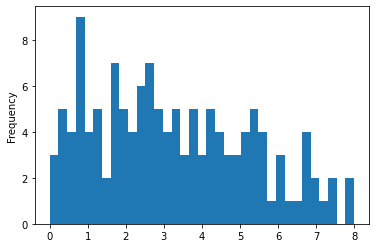

In [18]:
df_score.plot(kind='hist', bins=35, range=(0, 8))

In [19]:
df_score

564    3.419923e+00
685   -3.617506e+00
420   -1.687918e+00
682    4.891718e+00
257    6.349897e-02
           ...     
805    2.755119e+00
871   -1.079433e+00
831   -2.758243e+09
197    3.789190e+00
112   -2.758177e+09
Name: pts_y, Length: 201, dtype: float64